In [133]:
import pickle
with open('shaped.pickle', 'rb') as f:
    ab = pickle.load(f)

## 297 embeddings size 1200

In [2]:
ab.shape

(297, 1200)

# Новий розділ

In [4]:
!pip uninstall tensorflow tensorflow-macos tensorflow-metal -y
!pip install tensorflow-macos
!pip install tensorflow-metal

Found existing installation: tensorflow 2.16.2
Uninstalling tensorflow-2.16.2:
  Successfully uninstalled tensorflow-2.16.2
Found existing installation: tensorflow-macos 2.16.2
Uninstalling tensorflow-macos-2.16.2:
  Successfully uninstalled tensorflow-macos-2.16.2
Found existing installation: tensorflow-metal 1.2.0
Uninstalling tensorflow-metal-1.2.0:
  Successfully uninstalled tensorflow-metal-1.2.0
  Using cached tensorflow_macos-2.16.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached tensorflow-2.16.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.1 kB)
Using cached tensorflow_macos-2.16.2-cp312-cp312-macosx_12_0_arm64.whl (2.1 kB)
Using cached tensorflow-2.16.2-cp312-cp312-macosx_12_0_arm64.whl (227.1 MB)
  Using cached tensorflow_metal-1.2.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (1.3 kB)
Using cached tensorflow_metal-1.2.0-cp312-cp312-macosx_12_0_arm64.whl (1.4 MB)


In [5]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import numpy #,  string #pandas, xgboost, textblob,
#from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import layers, models, optimizers

In [6]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("Devices:", tf.config.list_physical_devices())

TensorFlow Version: 2.16.2
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
# Define models:

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, valid_y)

def train_model2(classifier, feature_vector_train, label, feature_vector_valid, valid_Y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, valid_Y)

In [8]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import numpy as np
from scipy.sparse import csr_matrix

import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import time
import warnings

import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import scipy

In [135]:
y_ = np.ones(len(ab))

In [177]:
start_time = time.time()
#a = np.reshape(np.array(tempvar),(297*20,60))

#base parameters
default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10, #maybe more
                'n_clusters': 4, #3 is actual number
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

params = default_base.copy()

pca = TruncatedSVD(n_components=10)
pca.fit(ab)
#csr_matrix(
transformed_ = pca.transform(ab)
end_time = time.time()
end_time-start_time

1.7880220413208008

In [11]:
#X_embedded2 = X_embedded

In [12]:
#X_embedded = transformed_

In [179]:
start_time = time.time()
#X_embedded = TSNE(n_components=2).fit_transform(transformed_)
X_embedded = transformed_
end_time = time.time()
end_time-start_time

8.487701416015625e-05

In [205]:
# ============
# Create cluster objects
# ============


two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'], random_state=12)

clustering_algorithms = (
        ('MBatchKMeans', two_means),
)

plot_num = 1

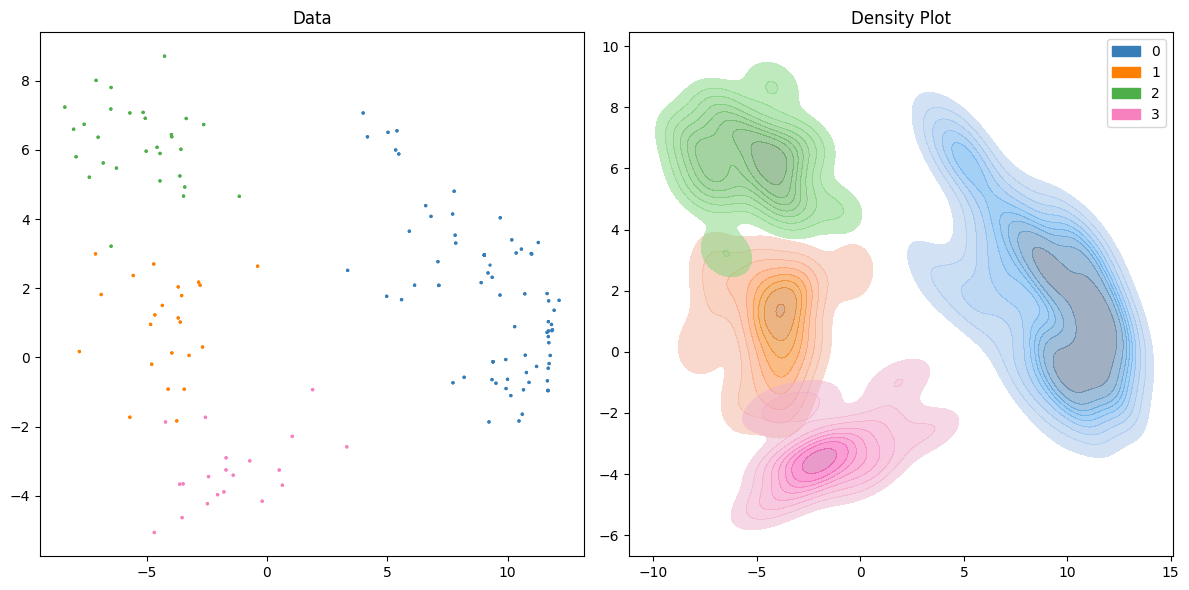

0.015186786651611328

In [207]:
for name, algorithm in clustering_algorithms:

        t0 = time.time()

        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X_embedded)



        t1 = time.time()

        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X_embedded)

        colors = np.array(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00'])
        colors = np.append(colors, ["#000000"])

        unique_labels = np.unique(y_pred)
        color_mapping = {label: colors[label] for label in unique_labels}
        
        colors_predicted = np.array([color_mapping[label] for label in y_pred])
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        scatter = axes[0].scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, c=colors_predicted)
        axes[0].set_title("Data")
        
        sns.kdeplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_pred, fill=True, alpha=0.5, palette=color_mapping)
        axes[1].set_title("Density Plot")
        
        plt.tight_layout()
        plt.show()

t1-t0

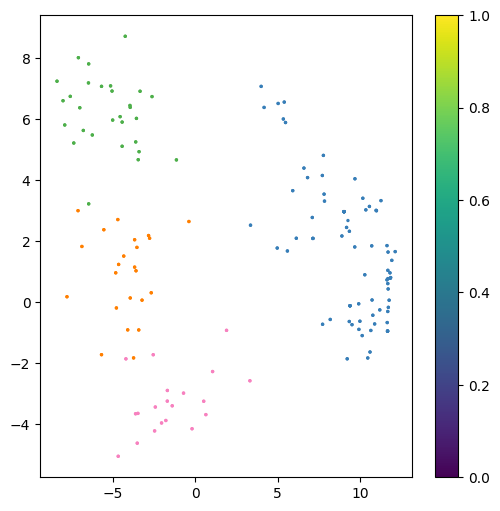

In [209]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(y_pred) + 1))))

plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, c=colors[y_pred])
plt.colorbar()
plt.show()

In [211]:
y_pred.shape
import copy

y_pred_saved = copy.deepcopy(y_pred)
y_pred_saved.shape

(297,)

In [213]:
#optional classifiers to choose
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
#import seaborn as sns

In [214]:
# ab (297x1200)!

In [215]:
start_time = time.time()
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(X_embedded, y_pred)
end_time = time.time()
end_time-start_time

0.0015301704406738281

In [216]:
import numpy as np
#import pandas as pd
import os

import tensorflow as tf
#import tensorflow_addons as tfa #none
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output

import glob
#import imageio
import time
import IPython.display as ipd

#AUTOTUNE = tf.data.experimental.AUTOTUNE

In [217]:
# Shallow Neural Networks
# model nx100xn

import numpy as np
import scipy.sparse
import tensorflow as tf

import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [218]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K

In [219]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model

In [220]:
def create_dense_ae():
    # Розмірність кодованого простору
    hidden_dim = 60
    encoding_dim = 2

    # Кодувальник
    input = Input(shape=(10*1, )) # 10*1,  - розмірність вхідного шару
    # Додатковий шар для кодування вхідного представлення
    flat = Flatten()(input)

    hidden = Dense(hidden_dim, activation='relu')(flat)
    hidden2 = Dense(hidden_dim, activation='relu')(hidden)
    # Приховане подання кодувальника
    encoded = Dense(encoding_dim, activation='relu')(hidden2)

    # Декодувальник
    # Аналогічним чином, але послідовність шарів протилежна кодувальнику
    input_encoded = Input(shape=(encoding_dim,))
    hidden_encoded = Dense(hidden_dim, activation='sigmoid')(input_encoded)
    hidden_encoded2 = Dense(hidden_dim, activation='sigmoid')(hidden_encoded)

    flat_decoded = Dense(10*1, activation='sigmoid')(hidden_encoded2)
    decoded = Reshape((10*1, ))(flat_decoded)

    # Таким чином можна подати окремо модель як для кодувальника так і декодувальника
    # Або подавати шари окермо
    encoder = Model(input, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input, decoder(encoder(input)), name="autoencoder")
    return encoder, decoder, autoencoder

In [221]:
# перелік наявних пристроїв (у випадку TF-DML)

In [222]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [223]:
with tf.device("/device:GPU:0"): # /device:DML:0 для версії 1.15
    encoder, decoder, autoencoder = create_dense_ae()
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [224]:
# якщо немає відеокарти як такої (наприклад, якщо є процесор з ARM архітектурою без виділеного відеоядра), можливо написати і так:

In [225]:
#with tf.device("/device:CPU:0"):
#    encoder, decoder, autoencoder = create_dense_ae()
#    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [226]:
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 2)              │         4,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 10)             │         4,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,892 (34.73 KB)

 Trainable params: 8,892 (34.73 KB)

 Non-trainable params: 0 (0.00 B)

In [227]:
with tf.device("/device:GPU:0"):    # у версії TF-DML для 2.10 можна писати "/device:GPU:0" замість "/device:DML:0"
    start_time = time.time()
    autoencoder.fit(train_x, train_x,
        epochs=500,
        batch_size=50,
        shuffle=True,
        validation_data=(valid_x, valid_x))
    end_time = time.time()

print(end_time-start_time)

Epoch 1/500


2025-03-25 19:34:38.365864: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.0393 - loss: 0.5373 - val_accuracy: 0.0667 - val_loss: 0.3917
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.0482 - loss: 0.3107 - val_accuracy: 0.1867 - val_loss: 0.1694
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2441 - loss: 0.0953 - val_accuracy: 0.1867 - val_loss: -0.0438
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2277 - loss: -0.0516 - val_accuracy: 0.1867 - val_loss: -0.2527
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2400 - loss: -0.3451 - val_accuracy: 0.1867 - val_loss: -0.4586
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2658 - loss: -0.5570 - val_accuracy: 0.1867 - val_loss: -0.6591
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2361 - loss: -0.7122 - val_accuracy: 0.1867 - val_loss: -0.8546
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2186 - loss: -0.9680 - val_accuracy: 0.1867 - val_loss: 

In [228]:
# зауважте, що час виконання залежно від версії DirectML або типу обладнання може суттєво відрізнятися
# також час виконання на першій ітерації під відеокартою зазвичай вищий, ніж на наступних

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


2025-03-25 19:35:45.097761: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


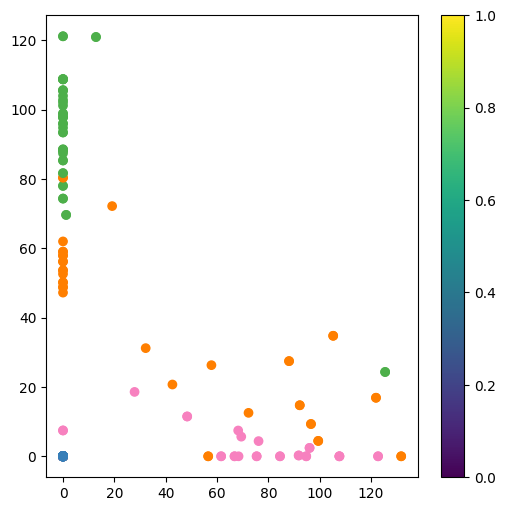

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


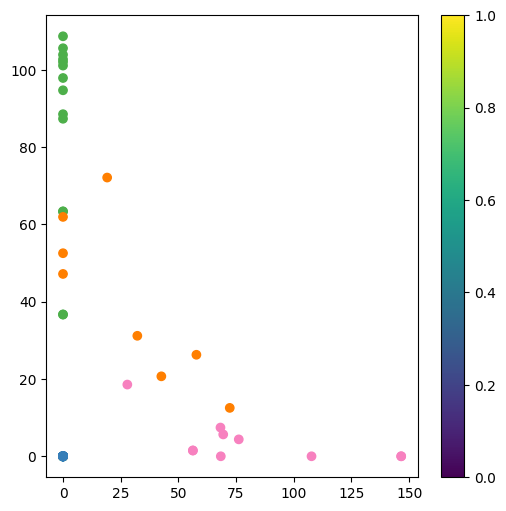

In [229]:
#Because latent space is two-dimensional, there are a few visualizations that can be done at this point.
#One is to look at the neighborhoods of different classes on the latent 2D plane:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(valid_y) + 1))))

start_time = time.time()
x_train_encoded = encoder.predict(train_x, batch_size=500)
plt.figure(figsize=(6, 6))
plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], c = colors[train_y])
plt.colorbar()
plt.show()

x_test_encoded = encoder.predict(valid_x, batch_size=500)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c = colors[valid_y])
plt.colorbar()
plt.show()
end_time = time.time()

In [230]:
start_time = time.time()
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(ab, y_pred)
end_time = time.time()
end_time-start_time

0.0013592243194580078

## aug

In [232]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
start_time = time.time()
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_embedded, y_pred)
end_time = time.time()
end_time-start_time

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


0.0016548633575439453

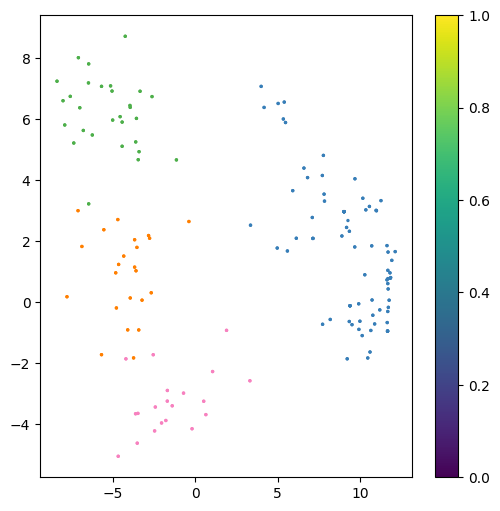

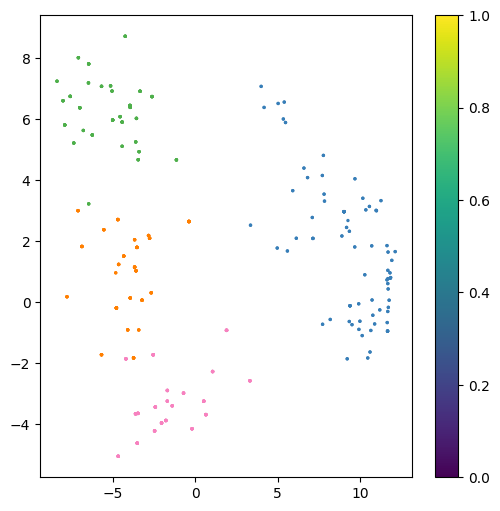

In [233]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(y_pred) + 1))))

plt.figure(figsize=(6, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=2, c=colors[y_pred])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], s=2, c=colors[y_resampled])
plt.colorbar()
plt.show()

In [234]:
#X_resampled, y_resampled = ros.fit_resample(X_embedded, y_pred)

In [235]:
from imblearn.over_sampling import SMOTE, ADASYN
start_time = time.time()
X_resampled2, y_resampled2 = SMOTE().fit_resample(X_embedded, y_pred)
#print(sorted(Counter(y_resampled).items()))
end_time = time.time()
end_time-start_time

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


0.003359079360961914

In [236]:
start_time = time.time()
clf_smote = LinearSVC().fit(X_resampled2, y_resampled2)
end_time = time.time()
end_time-start_time

0.003526926040649414

In [237]:
start_time = time.time()
X_resampled3, y_resampled3 = ADASYN().fit_resample(X_embedded, y_pred)
#print(sorted(Counter(y_resampled).items()))
end_time = time.time()
end_time-start_time

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


0.005084037780761719

In [238]:
start_time = time.time()
clf_adasyn = LinearSVC().fit(X_resampled3, y_resampled3)
end_time = time.time()
end_time-start_time

0.0030891895294189453

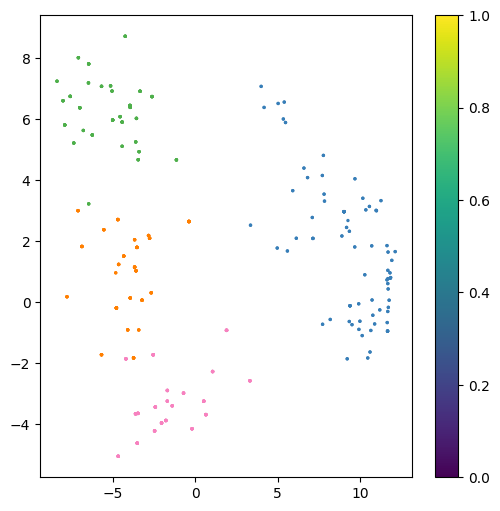

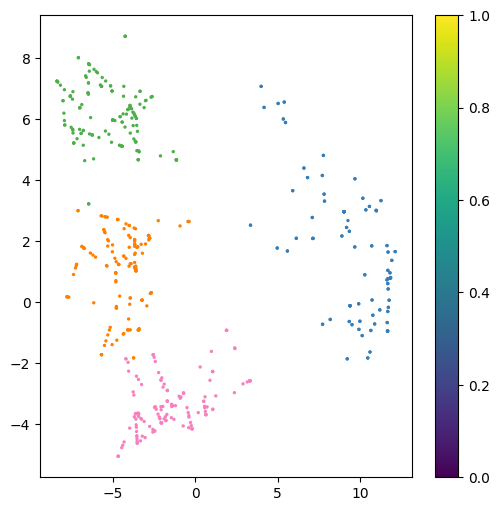

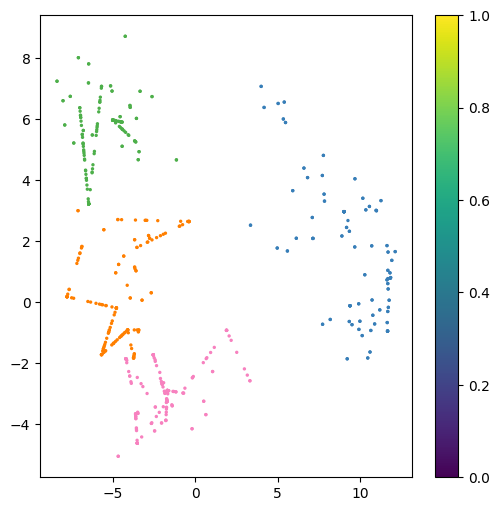

In [239]:
plt.figure(figsize=(6, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], s=2, c=colors[y_resampled])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled2[:, 0], X_resampled2[:, 1], s=2, c=colors[y_resampled2])
plt.colorbar()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_resampled3[:, 0], X_resampled3[:, 1], s=2, c=colors[y_resampled3])
plt.colorbar()
plt.show()

In [240]:
# stops here

In [241]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)

0.1303269863128662
1.0


<Axes: >

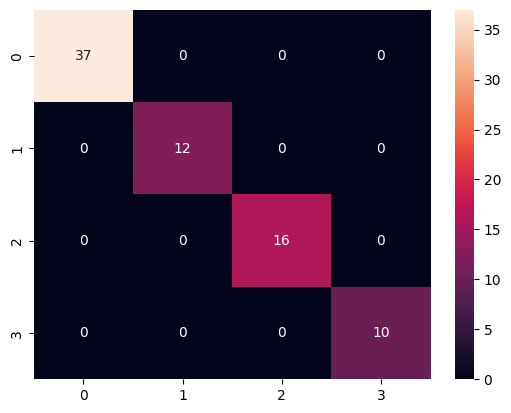

In [242]:
train_x_0, valid_x_0, train_y_0, valid_y_0 = model_selection.train_test_split(X_embedded, y_pred_saved)

start_time = time.time()
start_res = clf.fit(train_x_0, train_y_0)
end_time = time.time()

print(end_time - start_time)
print(start_res.score(valid_x_0, valid_y_0))
y_pred = start_res.predict(valid_x_0)


cf_matrix = confusion_matrix(valid_y_0, y_pred)
sns.heatmap(cf_matrix, annot=True)

0.16216611862182617
1.0


<Axes: >

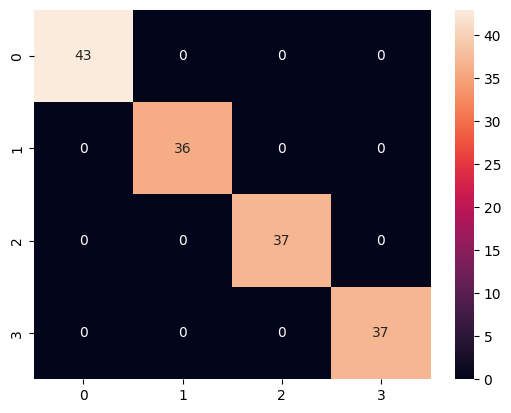

In [286]:
train_x_1, valid_x_1, train_y_1, valid_y_1 = model_selection.train_test_split(X_resampled, y_resampled)

start_time = time.time()
ros_res = clf.fit(train_x_1, train_y_1)
end_time = time.time()

print(end_time - start_time)
print(ros_res.score(valid_x_1, valid_y_1))
y_pred = ros_res.predict(valid_x_1)

cf_matrix = confusion_matrix(valid_y_1, y_pred)
sns.heatmap(cf_matrix, annot=True)

0.1914081573486328
0.9869281045751634


<Axes: >

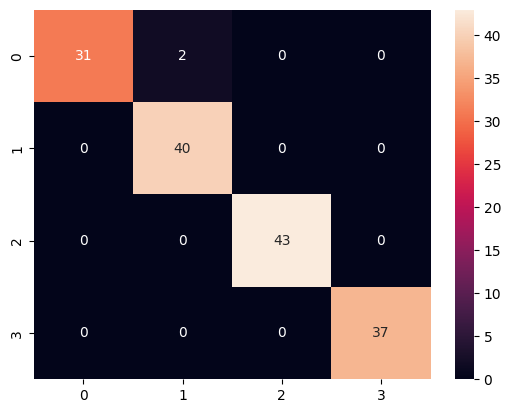

In [288]:
train_x_2, valid_x_2, train_y_2, valid_y_2 = model_selection.train_test_split(X_resampled2, y_resampled2)

start_time = time.time()
sm_res = clf.fit(train_x_2, train_y_2)
end_time = time.time()

print(end_time - start_time)
print(sm_res.score(valid_x_2, valid_y_2))
y_pred = sm_res.predict(valid_x_2)

cf_matrix = confusion_matrix(valid_y_2, y_pred)
sns.heatmap(cf_matrix, annot=True)

0.19826483726501465
1.0


<Axes: >

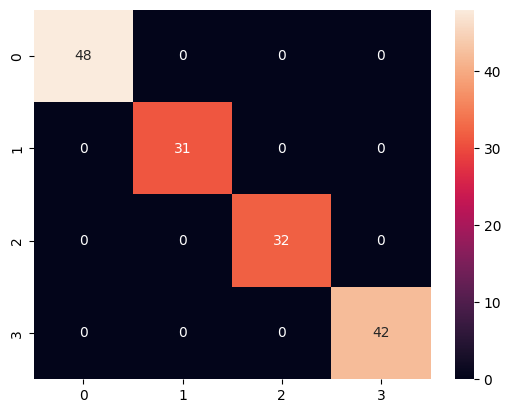

In [290]:
train_x_3, valid_x_3, train_y_3, valid_y_3 = model_selection.train_test_split(X_resampled3, y_resampled3)

start_time = time.time()
ad_res = clf.fit(train_x_3, train_y_3)
end_time = time.time()

print(end_time - start_time)
print(ad_res.score(valid_x_3, valid_y_3))
y_pred = ad_res.predict(valid_x_3)

cf_matrix = confusion_matrix(valid_y_3, y_pred)
sns.heatmap(cf_matrix, annot=True)